### Область работы 1 (библиотеки)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, KFold, ParameterGrid,RandomizedSearchCV,cross_validate
from sklearn.model_selection import TunedThresholdClassifierCV, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import fbeta_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.decomposition import PCA

from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from collections import defaultdict
from collections import OrderedDict

### Область работы 2 (поиск  модели .... )

In [6]:
path_train = 'train.csv'
train_y = 'train_Y.csv'

In [7]:
df_x = pd.read_csv(path_train)
df_x.tail(3)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
47360,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,5.0,20.0,0.0,0.0,9.0,4.0,6.0
47361,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0,8.0
47362,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,5.0,0.0,1.0,9.0,4.0,2.0


In [8]:
y_df = pd.read_csv(train_y)
y_df.shape

(47363, 1)

In [9]:
df= pd.concat([df_x, y_df], axis=1)  # axis=0 — по строкам
display(df)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0,1.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47358,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0,1.0
47359,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,1.0,0.0,1.0,9.0,6.0,8.0,0.0
47360,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,20.0,0.0,0.0,9.0,4.0,6.0,1.0
47361,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0,8.0,0.0


**EDA-анализ**

In [11]:
duplicates = df[df.duplicated()]
print(df.duplicated().sum())

785


In [12]:
df = df.drop_duplicates()

In [13]:
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
Index: 46578 entries, 0 to 47362
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                46578 non-null  float64
 1   HighChol              46578 non-null  float64
 2   CholCheck             46578 non-null  float64
 3   BMI                   46578 non-null  float64
 4   Smoker                46578 non-null  float64
 5   Stroke                46578 non-null  float64
 6   HeartDiseaseorAttack  46578 non-null  float64
 7   PhysActivity          46578 non-null  float64
 8   Fruits                46578 non-null  float64
 9   Veggies               46578 non-null  float64
 10  HvyAlcoholConsump     46578 non-null  float64
 11  AnyHealthcare         46578 non-null  float64
 12  NoDocbcCost           46578 non-null  float64
 13  GenHlth               46578 non-null  float64
 14  MentHlth              46578 non-null  float64
 15  PhysHlth              46

None

,count,mean,std,min,25%,50%,75%,max
HighBP,46578.0,0.569496,0.495152,0.0,0.0,1.0,1.0,1.0
HighChol,46578.0,0.527717,0.499237,0.0,0.0,1.0,1.0,1.0
CholCheck,46578.0,0.975396,0.154916,0.0,1.0,1.0,1.0,1.0
BMI,46578.0,29.934604,7.168650,12.0,25.0,29.0,33.0,98.0
Smoker,46578.0,0.480205,0.499613,0.0,0.0,0.0,1.0,1.0
Stroke,46578.0,0.063893,0.244565,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,46578.0,0.150908,0.357963,0.0,0.0,0.0,0.0,1.0
PhysActivity,46578.0,0.697153,0.459494,0.0,0.0,1.0,1.0,1.0
Fruits,46578.0,0.606102,0.488618,0.0,0.0,1.0,1.0,1.0
Veggies,46578.0,0.785500,0.410480,0.0,1.0,1.0,1.0,1.0


array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>],
       [<Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>],
       [<Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'

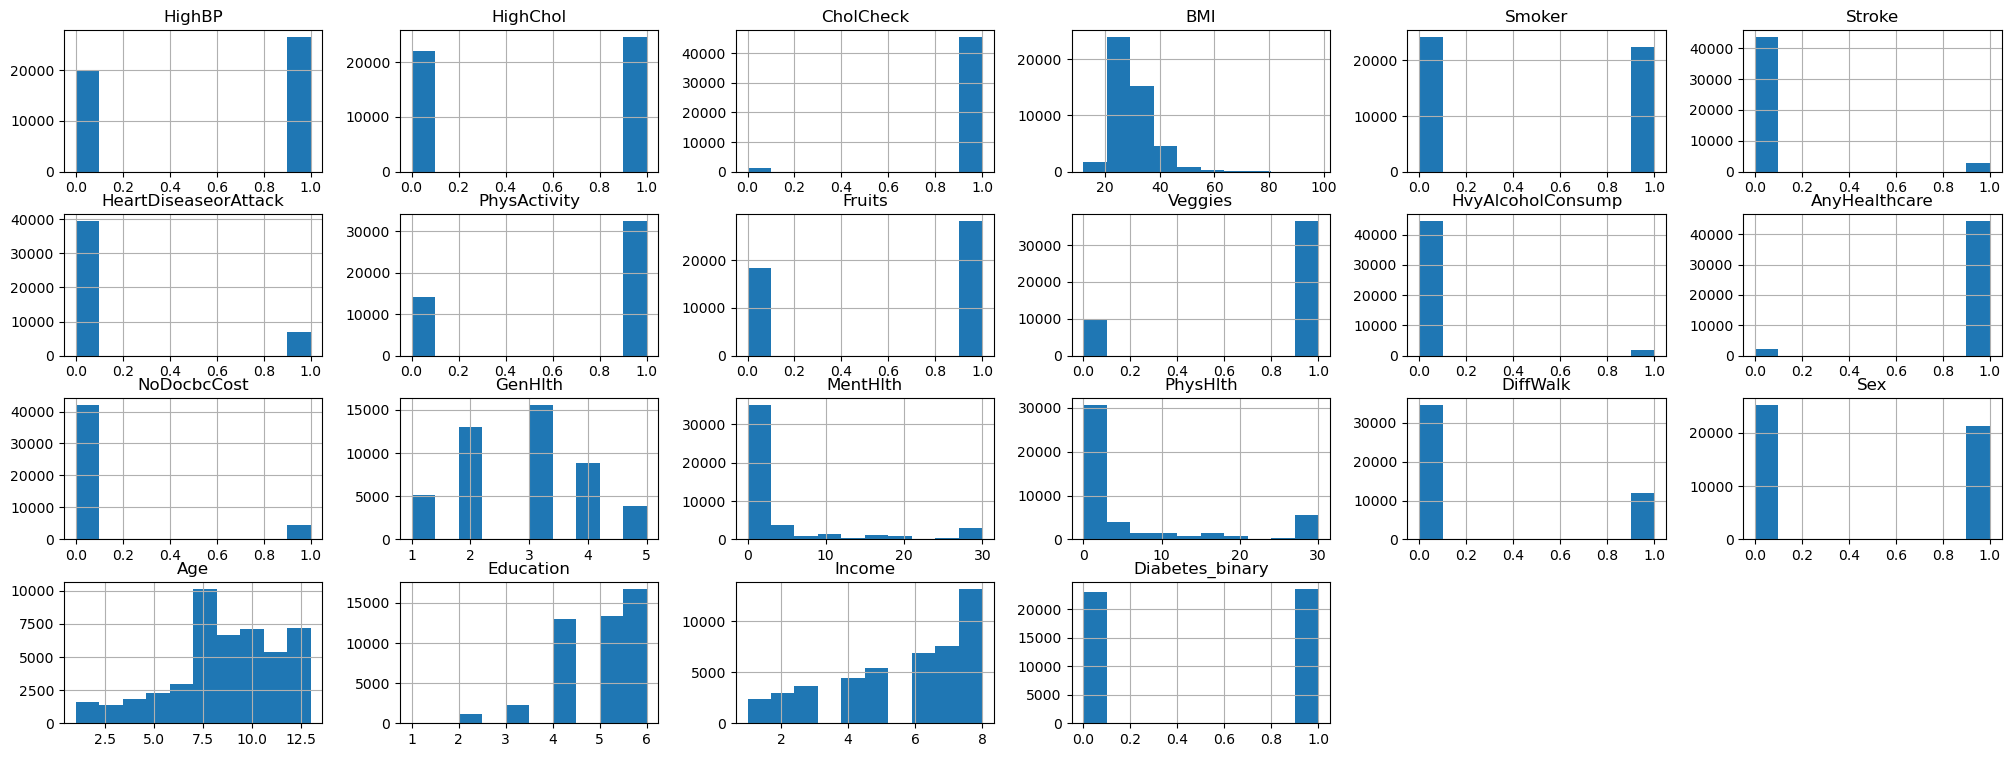

In [14]:
df.hist(figsize=(25, 9), layout=(-1, 6))

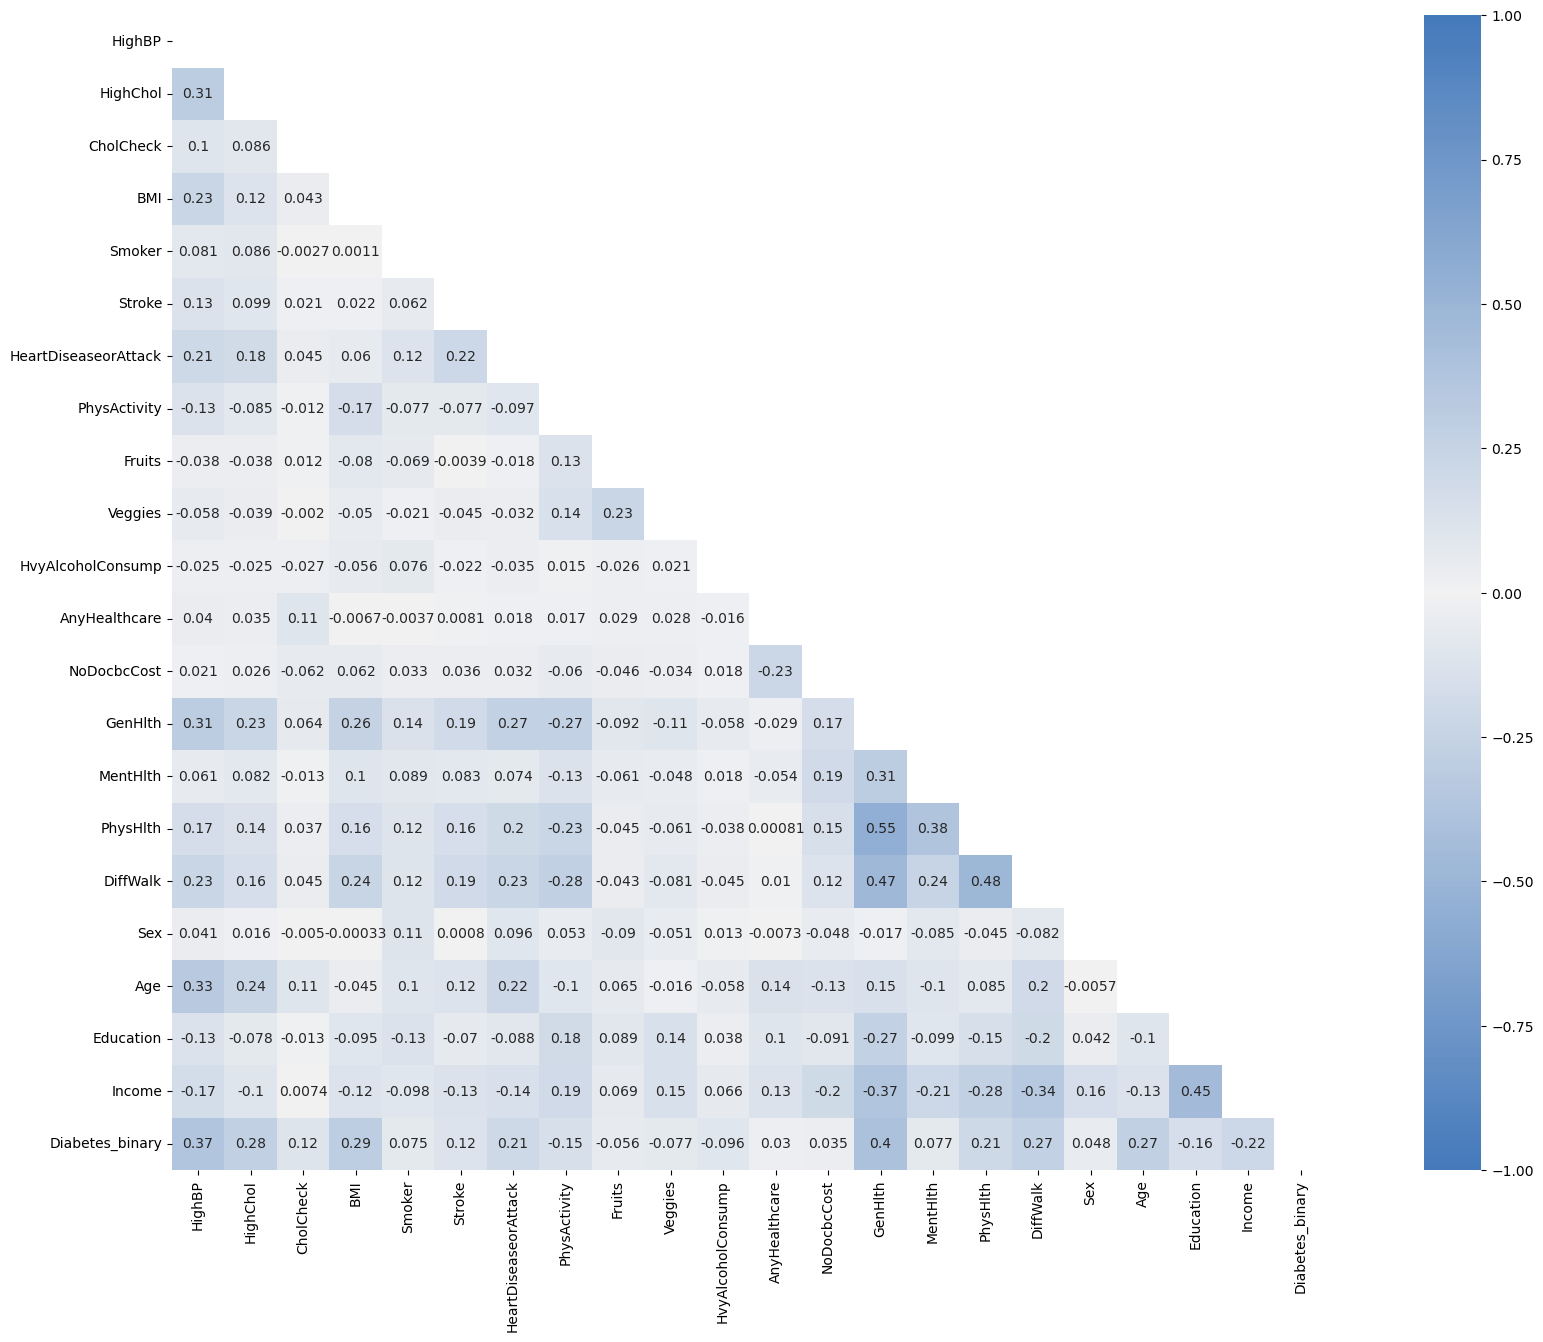

In [15]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0,
    square=True,
    ax=ax);

Некоторые признаки коррелированы, но не сильно. Попробуем избавиться от мультиколлинеарности

In [17]:
y = np.array(df.Diabetes_binary)
X = df.drop(columns=['Diabetes_binary'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
pt = PowerTransformer(method='box-cox')
X_train_pt = pt.fit_transform(X_train + 1)
X_test_pt  = pt.transform(X_test + 1)

Правильность на обучающем наборе: 0.794
Правильность на тестовом наборе: 0.752


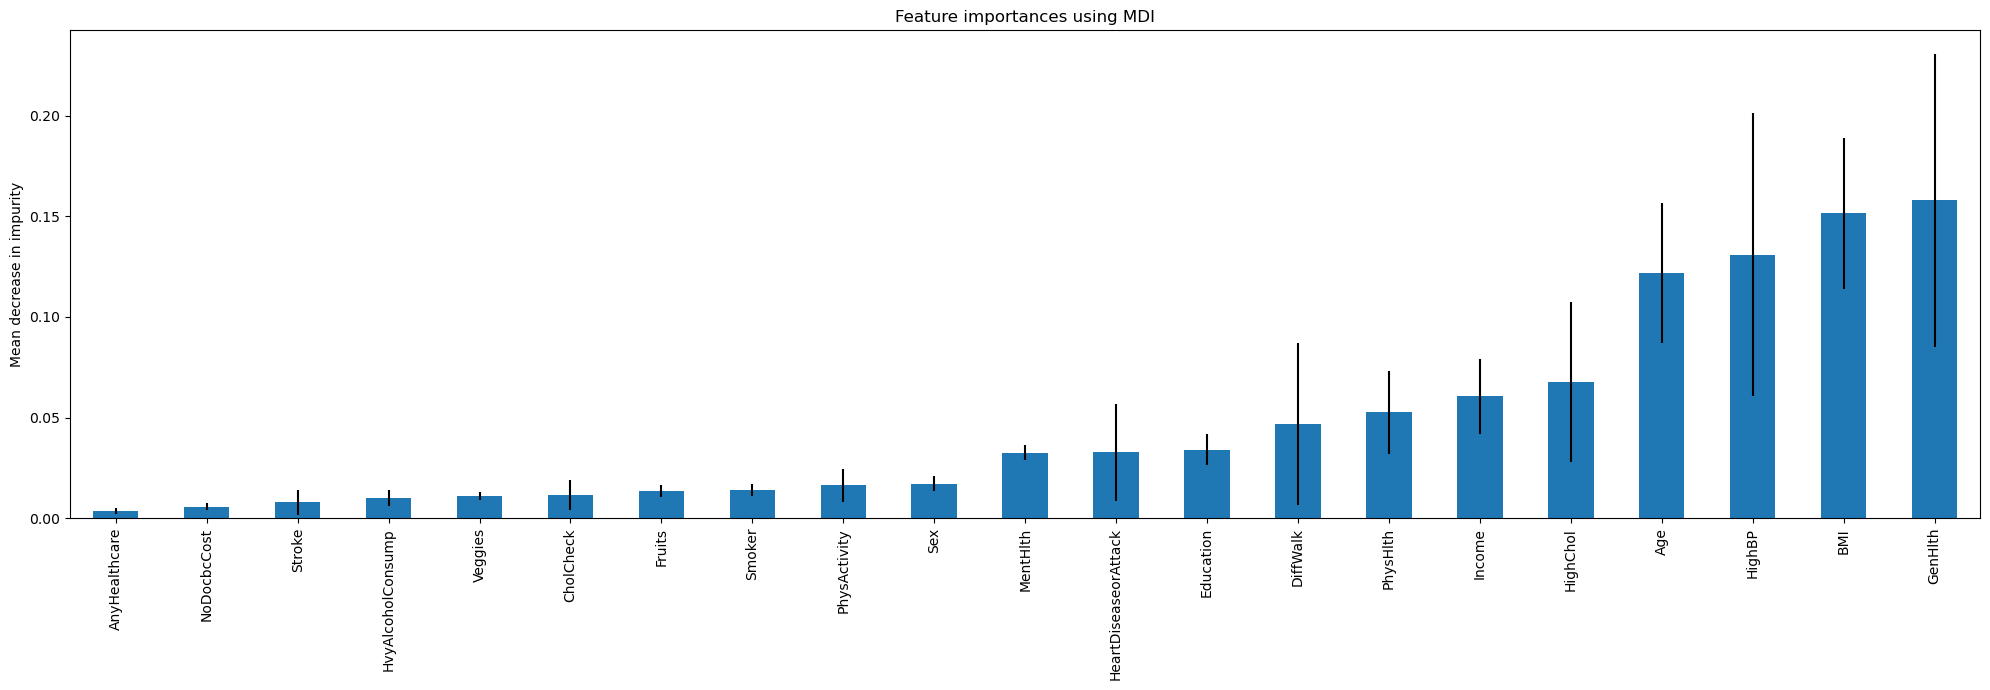

In [19]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=500, max_features=2,  min_samples_leaf = 5,
                               oob_score = True) 
forest.fit(X_train_pt, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train_pt, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test_pt, y_test)))

feature_names = X.columns
forest_importances = pd.DataFrame(forest.feature_importances_, index=feature_names, columns =['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(20,7))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

*Выберем подходящую метрику:*

In [21]:
# Используем F-бэтта, т.к. нам необходимо штрафовать в 2 раза сильнее за пропущенный диабет, чем за ошибочный диагноз диабета. beta^2 = 2; --->
beta=2**0.5
fbeta_scorer = make_scorer(fbeta_score, beta=beta)
# fbeta_scorer

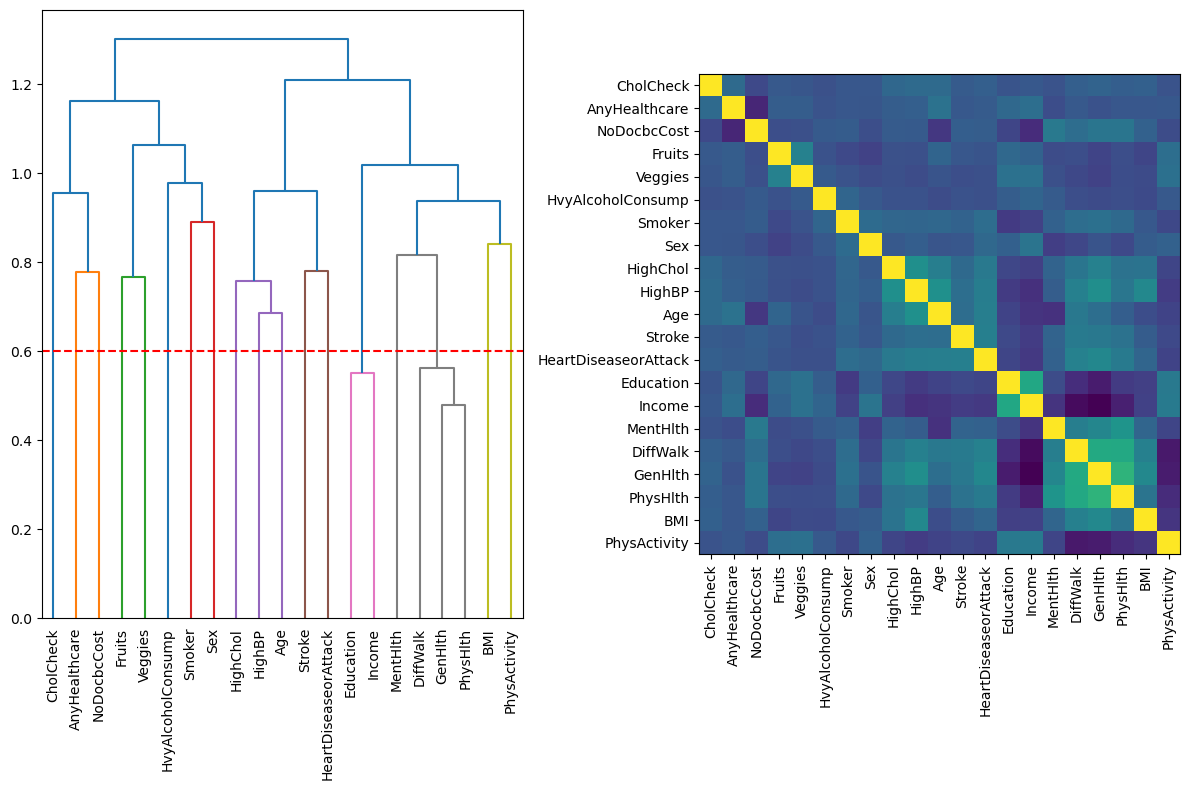

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation

corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = X.columns,
    ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.axhline(y=0.6, color='r', linestyle='--')

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(X.columns[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(X.columns[dendro["leaves"]])
fig.tight_layout()
plt.show()

Точность тестовых данных с удаленными признаками: 0.751

F_beta Score (beta=sqrt(2)) on Test Set: 0.7748508490133089


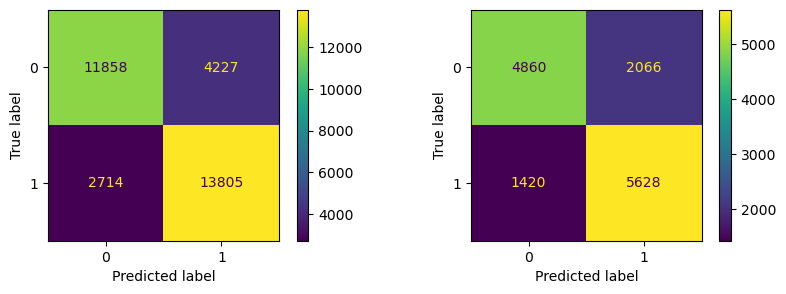

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19]
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'Sex', 'Age', 'Education'],
      dtype='object')


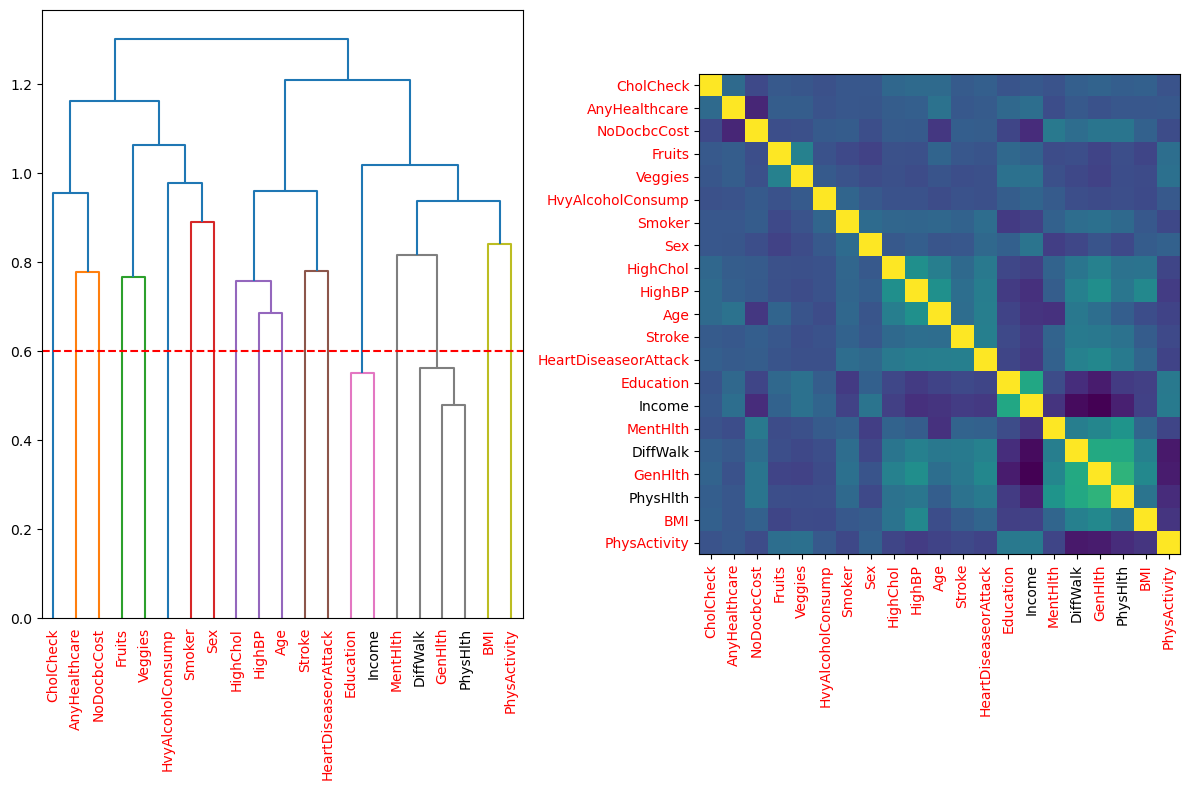

In [23]:
cluster_ids = hierarchy.fcluster(dist_linkage, 0.6, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

clf_sel = RandomForestClassifier(criterion='entropy', n_estimators=500, max_features=2,  min_samples_leaf = 5,
                               oob_score = True) 
clf_sel.fit(X_train_sel, y_train)

y_pred_train = clf_sel.predict(X_train_sel)
y_pred = clf_sel.predict(X_test_sel)
print(
    "Точность тестовых данных с удаленными признаками: {:.3f}".format(
        clf_sel.score(X_test_sel, y_test))
)

f_beta_test = fbeta_score(y_test, y_pred, beta=beta)
print("\nF_beta Score (beta=sqrt(2)) on Test Set:", f_beta_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred_train)).plot(ax=ax1);
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(ax=ax2);
plt.show();

selected_features_names = X.columns[selected_features]
print(selected_features)
print(selected_features_names)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = X.columns,
    ax=ax1, leaf_rotation=90
)

ax1.axhline(y=0.6, color='r', linestyle='--')

[ax1.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(X.columns[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(X.columns[dendro["leaves"]])
fig.tight_layout()
[ax2.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
[ax2.get_yticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
plt.show()

In [24]:
df = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'Sex', 'Age', 'Education', 'Diabetes_binary']]

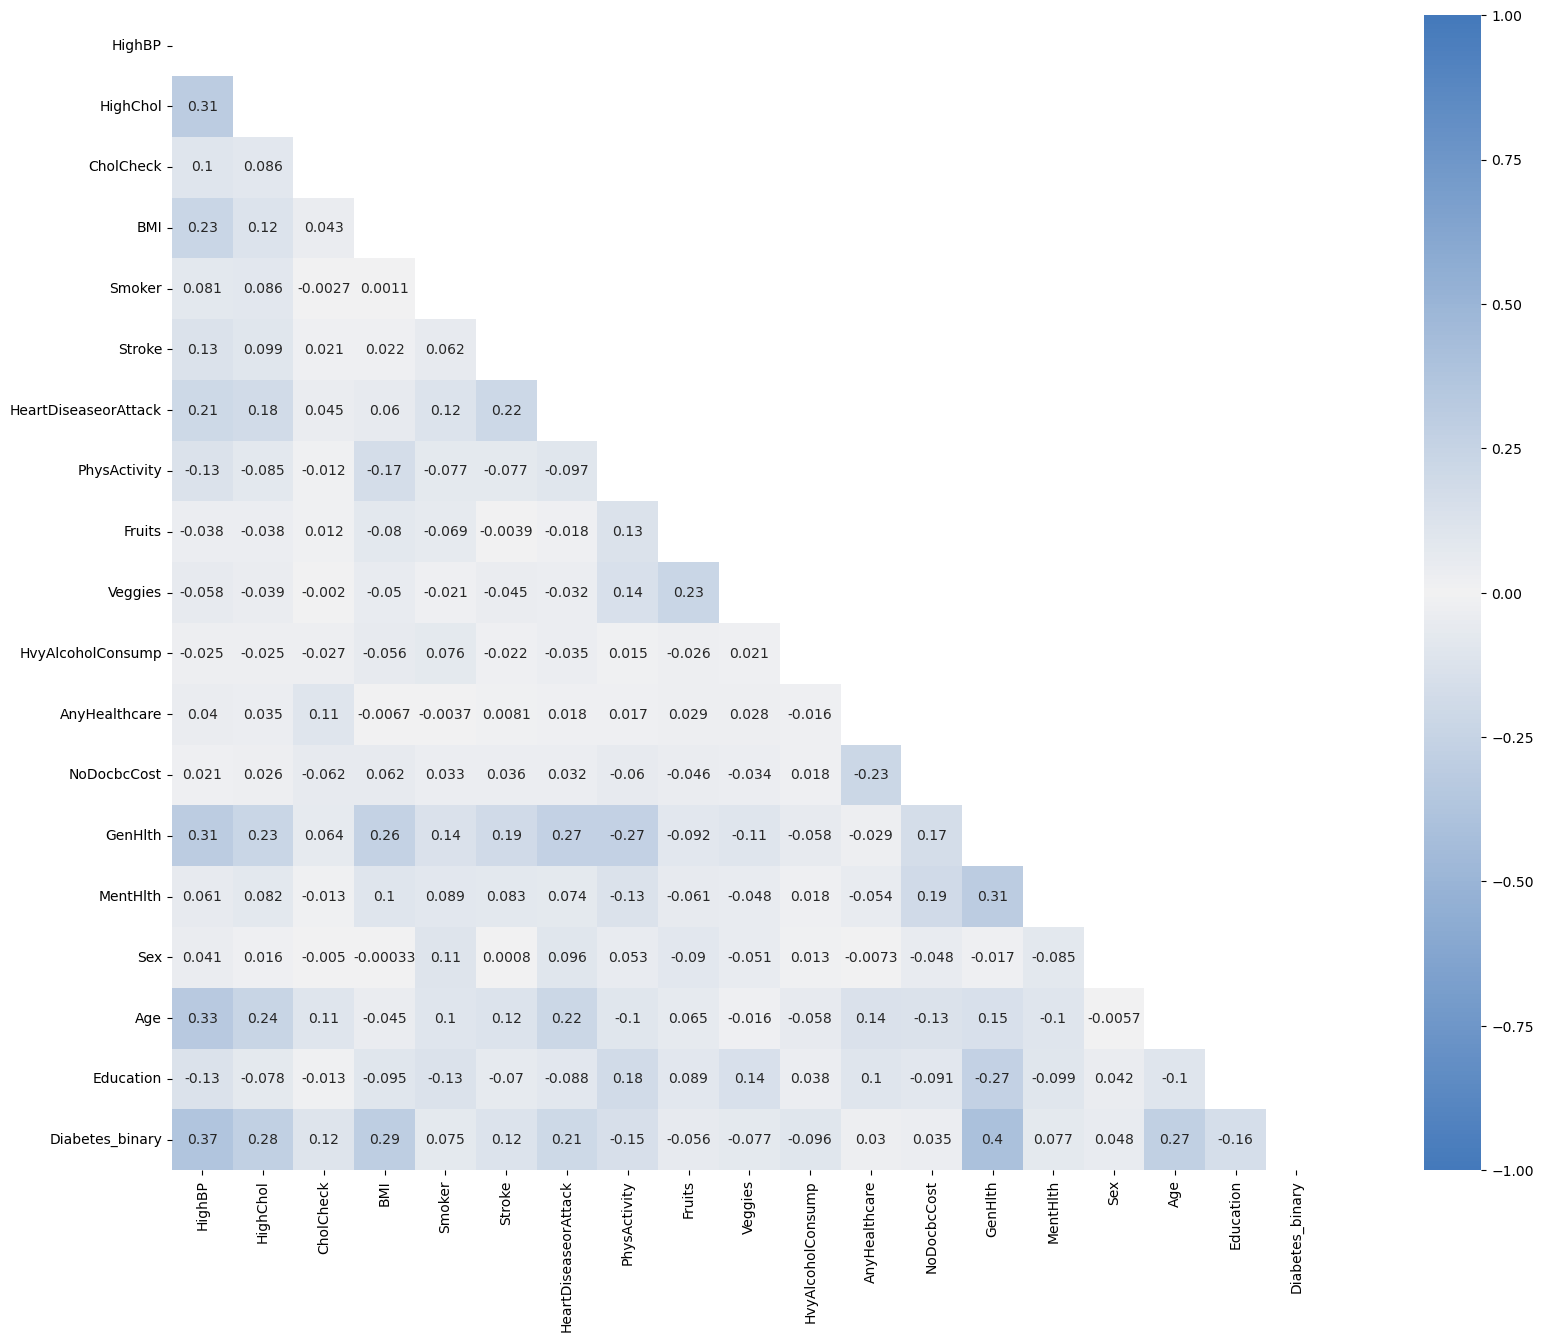

In [25]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0,
    square=True,
    ax=ax);

Мы избавились от наиболее коррелированных признаков, смогли немного улучшить качество обучения. Перейдем к блоку обучения моделей и подбора гиперпараметров.

**Random Forest**

In [28]:
y = np.array(df.Diabetes_binary)
X = df.drop(columns=['Diabetes_binary'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
# X.shape

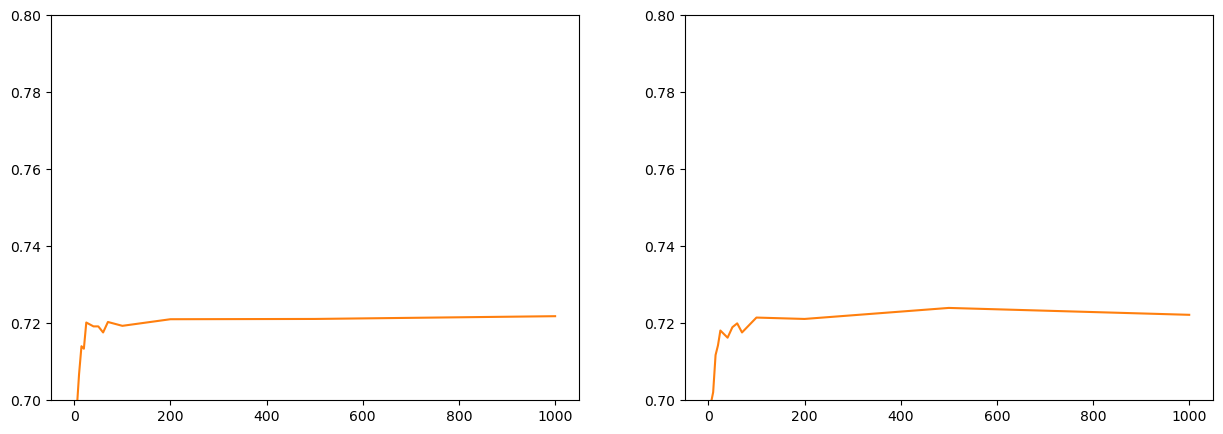

In [30]:
sc_train1 =[]
sc_test1 = []
sc_train2 =[]
sc_test2 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500, 1000]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n,  n_jobs = -1)
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, n_jobs = -1, criterion= 'entropy')
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n)    
    
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.7, 0.8)
ax2.plot(n_estimators,sc_train2)
ax2.plot(n_estimators,sc_test2)
ax2.set_ylim(0.7, 0.8);

C:\Users\zvlad\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\zvlad\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\zvlad\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


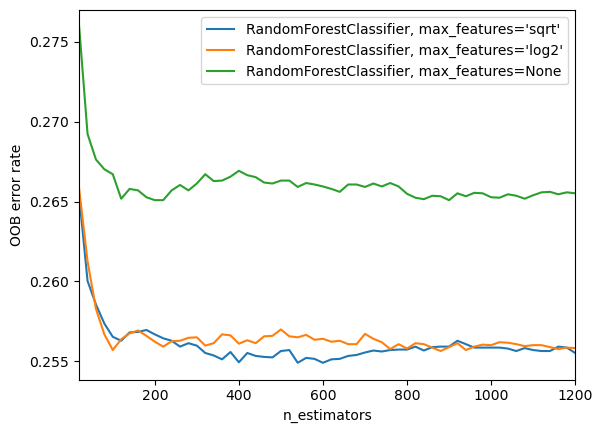

In [31]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 5,
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            n_jobs = -1,
            warm_start=True,
            min_samples_leaf = 5,
            max_features="log2",
            oob_score=True,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 5,
            warm_start=True,
            max_features=None,
            oob_score=True,
        ),
    ),
]

# Сопоставляем имя классификатора со списком пар (<n_estimators>, <коэффициент ошибок>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 20
max_estimators = 1200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 20):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Запишем ошибку OOB для каждой настройки `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        # Создаем график «Коэффициент ошибок OOB» и график «n_estimators».
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [32]:
min_features = 1
max_features = df.shape[1]

ensemble_clfs = [
    (
        "RandomForestClassifier, gini",
        RandomForestClassifier(
            criterion='gini',
             min_samples_leaf = 5,
            n_jobs = -1,
            oob_score=True,
        ),
    ),
    (
        "RandomForestClassifier, entropy",
        RandomForestClassifier(
            criterion='entropy',
             min_samples_leaf = 5,
            n_jobs = -1,
            oob_score=True,
        ),
    )
]
# Сопоставляем имя классификатора со списком пар (<n_estimators>, <коэффициент ошибок>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, clf in ensemble_clfs:
    for i in range(min_features, max_features + 1):
        clf.set_params(n_estimators = 500, max_features = i)
        clf.fit(X_train, y_train)

        # Запишем ошибку OOB для каждой настройки `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

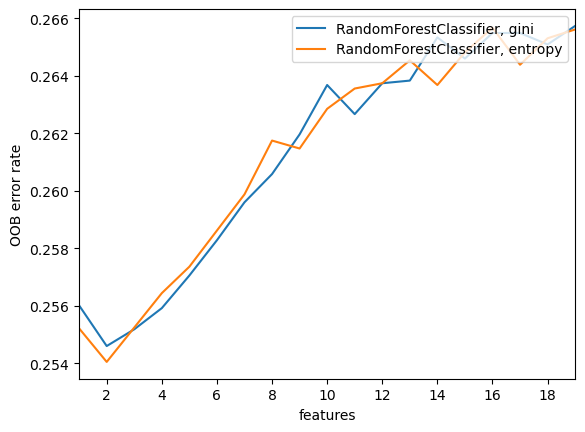

In [33]:
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_features, max_features)
plt.xlabel("features")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [34]:
forest = RandomForestClassifier(criterion='entropy',max_depth=12, n_estimators=1000,  max_features=2,  n_jobs=-1, min_samples_split=6, 
                                min_samples_leaf = 5, oob_score = True)
forest.fit(X_train, y_train)
beta=2**0.5
fbeta_scorer = make_scorer(fbeta_score, beta=beta)
y_train_pred = forest.predict(X_train)
y_pred = forest.predict(X_test)

f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
f_beta_test = fbeta_score(y_test, y_pred, beta=beta)
print('Правильность на обучающем наборе: {:.3f}'.format(f_beta_train))
print('Правильность на тестовом наборе: {:.3f}'.format(f_beta_test))

Правильность на обучающем наборе: 0.794
Правильность на тестовом наборе: 0.771


In [35]:
forest = RandomForestClassifier(max_depth=12, n_estimators=1000,  max_features=2,  n_jobs=-1, min_samples_split=6, min_samples_leaf = 5,
                               oob_score = True)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_pred = forest.predict(X_test)

f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
f_beta_test = fbeta_score(y_test, y_pred, beta=beta)
print('Правильность на обучающем наборе: {:.3f}'.format(f_beta_train))
print('Правильность на тестовом наборе: {:.3f}'.format(f_beta_test))


Правильность на обучающем наборе: 0.795
Правильность на тестовом наборе: 0.772


In [36]:
forest = RandomForestClassifier(max_depth=15, n_estimators=1000,  max_features=2,  n_jobs=-1, min_samples_split=6, min_samples_leaf = 5,
                               oob_score = True)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_pred = forest.predict(X_test)

f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
f_beta_test = fbeta_score(y_test, y_pred, beta=beta)
print('Правильность на обучающем наборе: {:.3f}'.format(f_beta_train))
print('Правильность на тестовом наборе: {:.3f}'.format(f_beta_test))

Правильность на обучающем наборе: 0.805
Правильность на тестовом наборе: 0.771


In [37]:
tuned_model_rf = TunedThresholdClassifierCV(
    estimator=forest,
    scoring=fbeta_scorer,
    store_cv_results=True,  # necessary to inspect all results
)
tuned_model_rf.fit(X_train, y_train)
print(f"{tuned_model_rf.best_threshold_=:0.2f}")


tuned_model_rf.best_threshold_=0.31


In [38]:
y_train_pred = tuned_model_rf.predict(X_train)
y_pred = tuned_model_rf.predict(X_test)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
f_beta_test = fbeta_score(y_test, y_pred, beta=beta)
print('Правильность на обучающем наборе: {:.3f}'.format(f_beta_train))
print('Правильность на тестовом наборе: {:.3f}'.format(f_beta_test))

Правильность на обучающем наборе: 0.830
Правильность на тестовом наборе: 0.815


**Gradient Boosting**

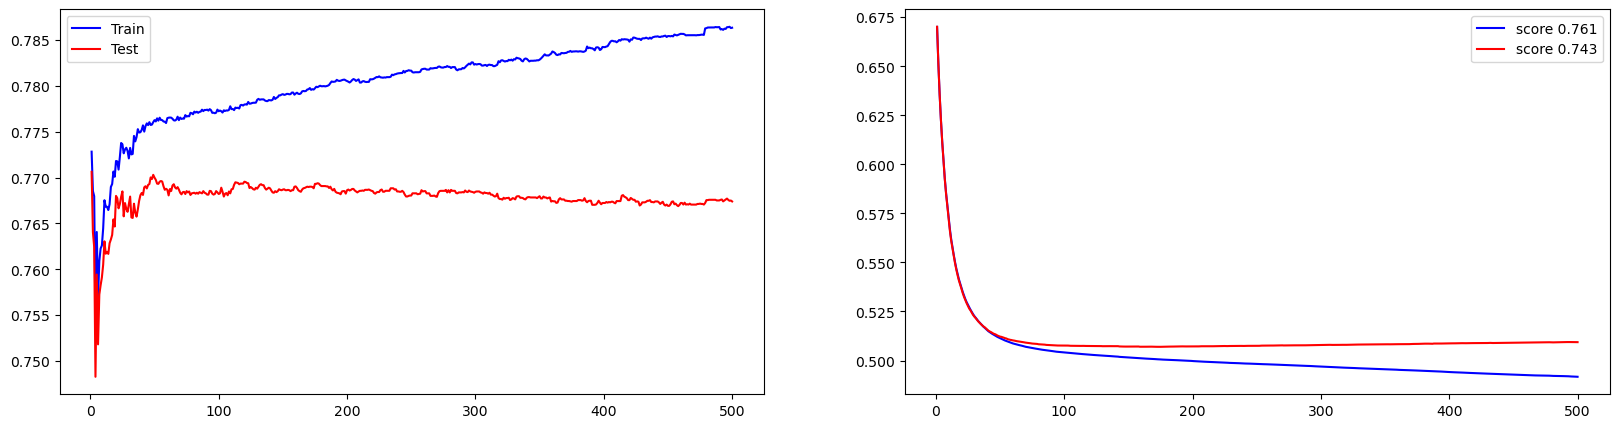

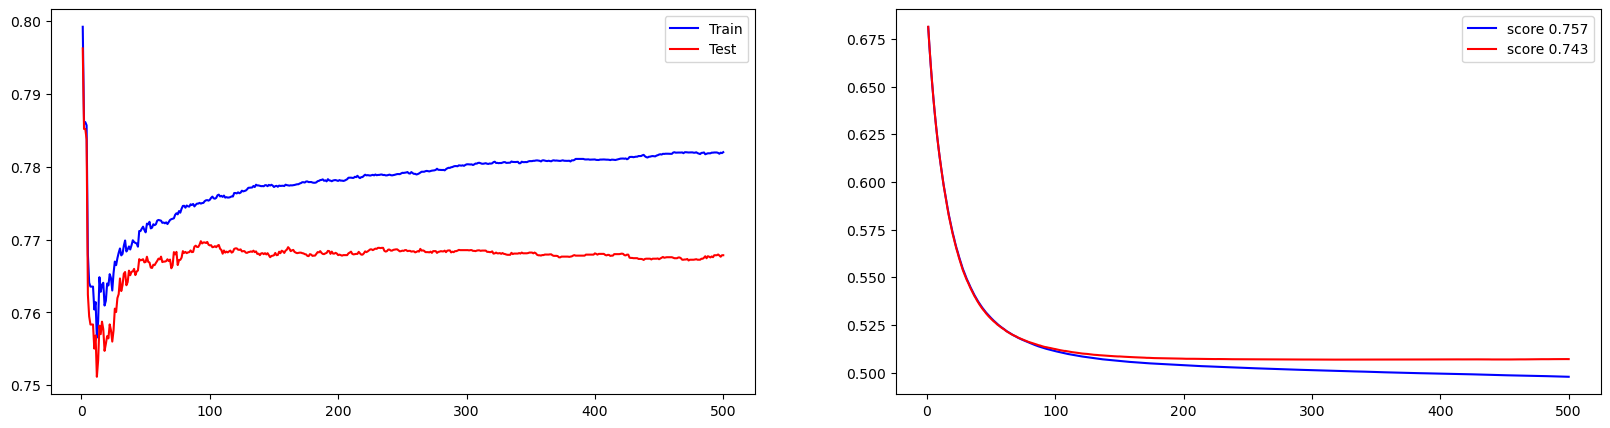

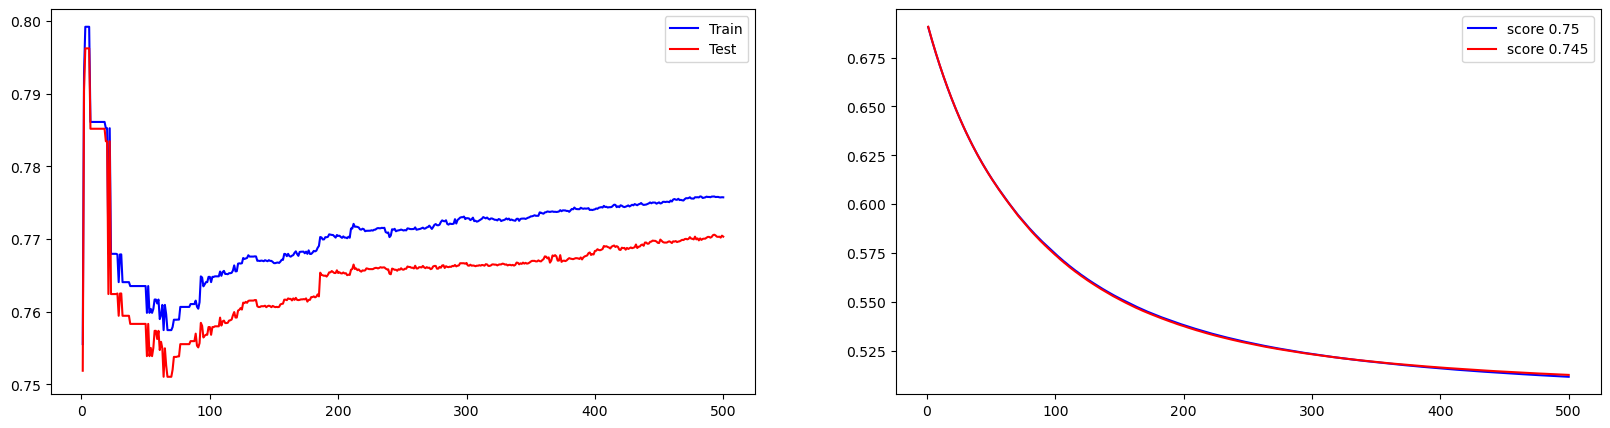

In [40]:
def plot_learnig_tree_new(estimator, X_train, X_test, y_train, y_test):  
    
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    n_estimators = estimator.n_estimators_
    zero = np.zeros(n_estimators, dtype=np.float64)
    color_one = 'blue'
    color_two = 'red'
    
    train_score = zero
    for i, y_pred_train in enumerate(estimator.staged_predict(X_train)):
        train_score[i] = fbeta_score(y_train, y_pred_train, beta=beta)
    ax1.plot(
        (np.arange(train_score.shape[0]) + 1),
        train_score,
        "-",
        color=color_one,
        label='Train',
        )
        
    test_score = zero
    for i, y_pred_test in enumerate(estimator.staged_predict(X_test)):
        train_score[i] = fbeta_score(y_test, y_pred_test, beta=beta)    
    ax1.plot(
        (np.arange(test_score.shape[0]) + 1),
        train_score,
        "-",
        color = color_two,
        label='Test',
        )
    ax1.legend(loc='best')


    train_deviance = zero
    for i, y_pred_train in enumerate(estimator.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred_train)
        
    ax2.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        '-',
        color=color_one,
        label="score "+str(round(estimator.score(X_train, y_train),3))
    )

    test_deviance = zero
    for i, y_pred_test in enumerate(estimator.staged_predict_proba(X_test)):
        test_deviance[i] = log_loss(y_test, y_pred_test)
        
    ax2.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        '-',
        color=color_two,
        label="score "+str(round(estimator.score(X_test, y_test),3))
    )
    ax2.legend(loc='best')    
    


clf = GradientBoostingClassifier(n_estimators=500)
clf.fit(X_train, y_train)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)


clf = GradientBoostingClassifier(n_estimators=500,learning_rate = 0.05)
clf.fit(X_train, y_train)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)


clf = GradientBoostingClassifier(n_estimators=500,learning_rate = 0.01)
clf.fit(X_train, y_train)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)

In [41]:
clf1 = GradientBoostingClassifier(n_estimators=80)
clf1.fit(X_train, y_train)
clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.05)
clf2.fit(X_train, y_train)
clf3 = GradientBoostingClassifier(n_estimators=380,learning_rate = 0.01)
clf3.fit(X_train, y_train)

y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)
y_pred_3 = clf3.predict(X_test)
f_beta_test1 = fbeta_score(y_test, y_pred_1, beta=beta)
f_beta_test2 = fbeta_score(y_test, y_pred_2, beta=beta)
f_beta_test3 = fbeta_score(y_test, y_pred_3, beta=beta)

print('Правильность на тестовом наборе: {:.4f}'.format(f_beta_test1))
print('Правильность на тестовом наборе: {:.4f}'.format(f_beta_test2))
print('Правильность на тестовом наборе: {:.4f}'.format(f_beta_test3))

Правильность на тестовом наборе: 0.7683
Правильность на тестовом наборе: 0.7679
Правильность на тестовом наборе: 0.7674


In [42]:
clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.05, max_depth=4, max_features=13, min_samples_split=4)
clf2.fit(X_train, y_train)
y_pred_2 = clf2.predict(X_test)
f_beta_test2 = fbeta_score(y_test, y_pred_2, beta=beta)
print('Правильность на тестовом наборе: {:.4f}'.format(f_beta_test2))

Правильность на тестовом наборе: 0.7690


In [43]:
tuned_model_gb = TunedThresholdClassifierCV(
    estimator=clf2,
    scoring=fbeta_scorer,
    store_cv_results=True,  # necessary to inspect all results
)
tuned_model_gb.fit(X_train, y_train)
print(f"{tuned_model_gb.best_threshold_=:0.2f}")

tuned_model_gb.best_threshold_=0.25


In [44]:
y_train_pred = tuned_model_gb.predict(X_train)
y_pred = tuned_model_gb.predict(X_test)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
f_beta_test = fbeta_score(y_test, y_pred, beta=beta)
print('Правильность на обучающем наборе: {:.3f}'.format(f_beta_train))
print('Правильность на тестовом наборе: {:.3f}'.format(f_beta_test))

Правильность на обучающем наборе: 0.823
Правильность на тестовом наборе: 0.813


In [45]:
log_reg = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, solver = 'sag', penalty = 'l2') )
log_reg.fit(X_train, y_train)
y_pred_2 = log_reg.predict(X_test)
f_beta_test2 = fbeta_score(y_test, y_pred_2, beta=beta)
print('Правильность на тестовом наборе: {:.4f}'.format(f_beta_test2))

Правильность на тестовом наборе: 0.7576


In [46]:
tuned_model_reg = TunedThresholdClassifierCV(
    estimator=log_reg,
    scoring=fbeta_scorer,
    store_cv_results=True,  # necessary to inspect all results
)
tuned_model_reg.fit(X_train, y_train)
print(f"{tuned_model_reg.best_threshold_=:0.2f}")
y_train_pred = tuned_model_reg.predict(X_train)
y_pred = tuned_model_reg.predict(X_test)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
f_beta_test = fbeta_score(y_test, y_pred, beta=beta)
print('Правильность на обучающем наборе: {:.3f}'.format(f_beta_train))
print('Правильность на тестовом наборе: {:.3f}'.format(f_beta_test))

tuned_model_reg.best_threshold_=0.27
Правильность на обучающем наборе: 0.816
Правильность на тестовом наборе: 0.814


In [47]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=80, p=1, n_jobs=-1) )
knn.fit(X_train, y_train)
y_pred_2 = knn.predict(X_test)
f_beta_test2 = fbeta_score(y_test, y_pred_2, beta=beta)
print('Правильность на тестовом наборе: {:.4f}'.format(f_beta_test2))

Правильность на тестовом наборе: 0.7601


In [48]:
tuned_model_knn = TunedThresholdClassifierCV(
    estimator=knn,
    scoring=fbeta_scorer,
    store_cv_results=True,  # necessary to inspect all results
)
tuned_model_knn.fit(X_train, y_train)
print(f"{tuned_model_knn.best_threshold_=:0.2f}")
y_train_pred = tuned_model_knn.predict(X_train)
y_pred = tuned_model_knn.predict(X_test)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
f_beta_test = fbeta_score(y_test, y_pred, beta=beta)
print('Правильность на обучающем наборе: {:.3f}'.format(f_beta_train))
print('Правильность на тестовом наборе: {:.3f}'.format(f_beta_test))

tuned_model_knn.best_threshold_=0.28
Правильность на обучающем наборе: 0.815
Правильность на тестовом наборе: 0.811


In [49]:
# forest = tuned_model_rf
# clf2 = tuned_model_gb
# log_reg = tuned_model_reg

# e_s_clf = StackingClassifier(
#         estimators = [
#             ('rf', forest), 
#             ('lg', log_reg),
#             ('gb', clf2)],
#         final_estimator = LogisticRegression(max_iter=1000),
#         stack_method = 'predict_proba',  n_jobs=-1
# )

# e_s_clf.fit(X_train,y_train)

StackingClassifier(estimators=[('rf',
                                TunedThresholdClassifierCV(estimator=RandomForestClassifier(max_depth=15,
                                                                                            max_features=2,
                                                                                            min_samples_leaf=5,
                                                                                            min_samples_split=6,
                                                                                            n_estimators=1000,
                                                                                            n_jobs=-1,
                                                                                            oob_score=True),
                                                           scoring=make_scorer(fbeta_score, response_method='predict', beta=1.4142135623730951),
                                                           store_cv_results=True)),
                               ('lg',
                                TunedThresholdClassifierCV(es...
                               ('gb',
                                TunedThresholdClassifierCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                                                                max_depth=4,
                                                                                                max_features=13,
                                                                                                min_samples_split=4,
                                                                                                n_estimators=200),
                                                           scoring=make_scorer(fbeta_score, response_method='predict', beta=1.4142135623730951),
                                                           store_cv_results=True))],
                   final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
                   stack_method='predict_proba')

In [53]:
# tuned_model_stak = TunedThresholdClassifierCV(
#     estimator=e_s_clf,
#     scoring=fbeta_scorer,
#     store_cv_results=True,  # necessary to inspect all results
# )
# tuned_model_stak.fit(X_train, y_train)
# print(f"{tuned_model_stak.best_threshold_=:0.2f}")
# y_train_pred = tuned_model_stak.predict(X_train)
# y_pred = tuned_model_stak.predict(X_test)
# f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
# f_beta_test = fbeta_score(y_test, y_pred, beta=beta)
# print('Правильность на обучающем наборе: {:.3f}'.format(f_beta_train))
# print('Правильность на тестовом наборе: {:.3f}'.format(f_beta_test))